# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


# Preparing Data

## Importing Various Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# importing my own python file
%load_ext autoreload
%autoreload 10
from shb import MakeModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing data

In [6]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
len(df.columns)

21

In [30]:
(df['id'].value_counts()>1).sum()
print(df.lat.shape, df.long.shape, df.price.shape)
print(df.lat.isna().sum(), df.long.isna().sum(), df.price.isna().sum())
df.info()

(21597,) (21597,) (21597,)
0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
m

In [33]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11bafdae8> (for post_execute):


ValueError: zero-size array to reduction operation minimum which has no identity

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1296x936 with 1 Axes>

In [5]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [295]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Preprocessing continuous columns

In [296]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [297]:
model1 = MakeModel(df, cat_cols=cat_cols, cont_cols=cont_cols)


In [298]:
np.abs(cor).unstack().sort_values(ascending=False)

sqft_living  sqft_above       0.876448
             sqft_living15    0.756402
sqft_above   sqft_living15    0.731767
sqft_lot     sqft_lot15       0.718204
price        sqft_living      0.701917
                                ...   
lat          price            0.000000
sqft_lot15   sqft_living15    0.000000
yr_built     sqft_above       0.000000
             sqft_lot         0.000000
price        price            0.000000
Length: 81, dtype: float64

[autoreload of shb failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances

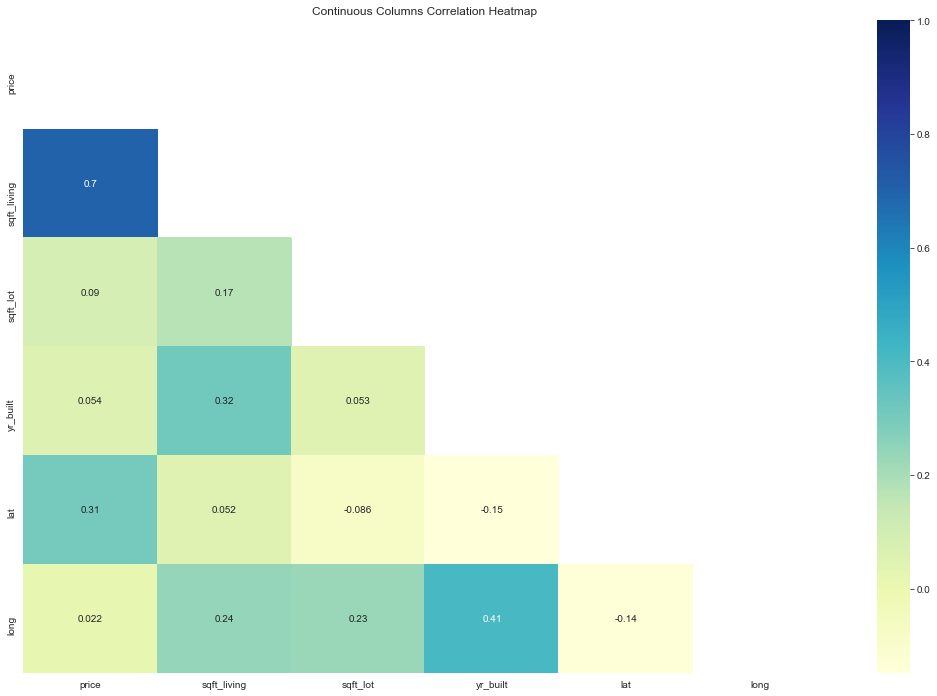

price        sqft_living    0.701917
yr_built     long           0.409993
sqft_living  yr_built       0.318152
price        lat            0.306692
sqft_living  long           0.241214
sqft_lot     long           0.230227
sqft_living  sqft_lot       0.173453
yr_built     lat            0.148370
lat          long           0.135371
price        sqft_lot       0.089876
dtype: float64
Write column name you would like to get rid of: x
Exiting!
There are 18 columns remaining in the data


In [307]:
model1.multicolinearity(option='cont')

In [312]:
model1.percent_data

100

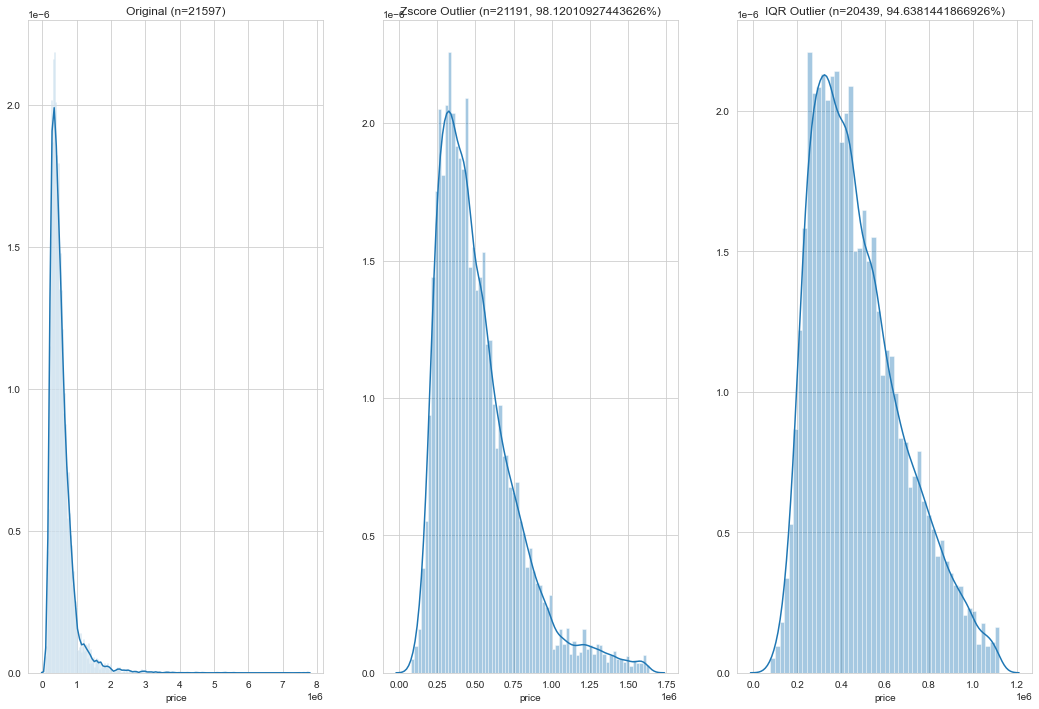

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


1158 number of data have been removed by this process.

So far we have 94.638% of original data.


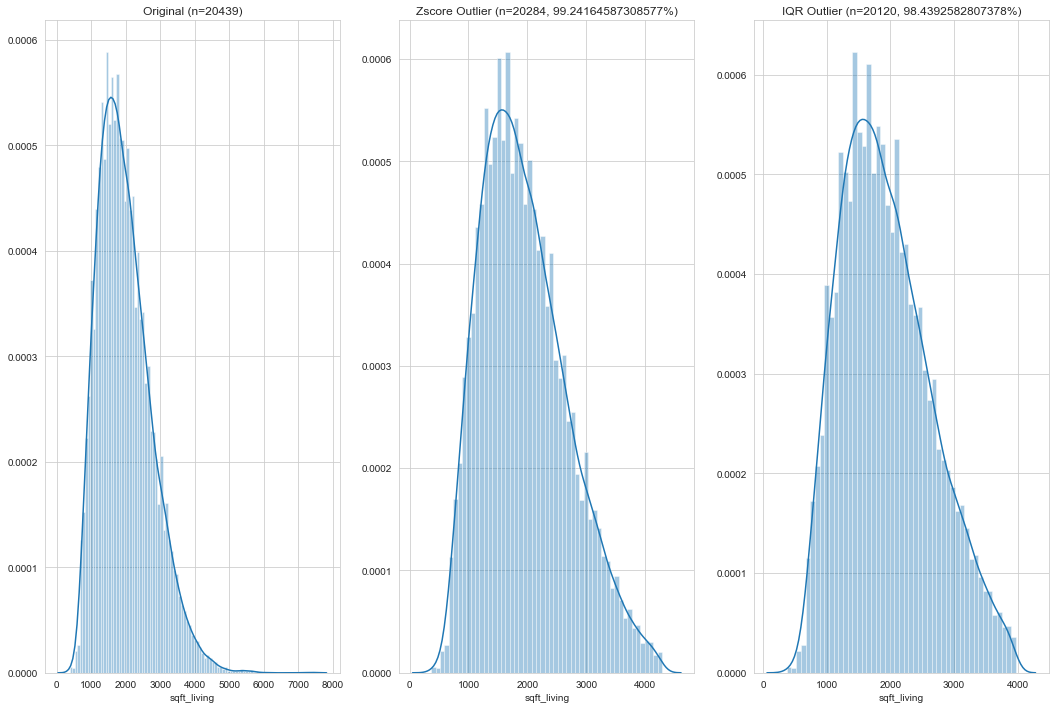

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


319 number of data have been removed by this process.

So far we have 93.161% of original data.


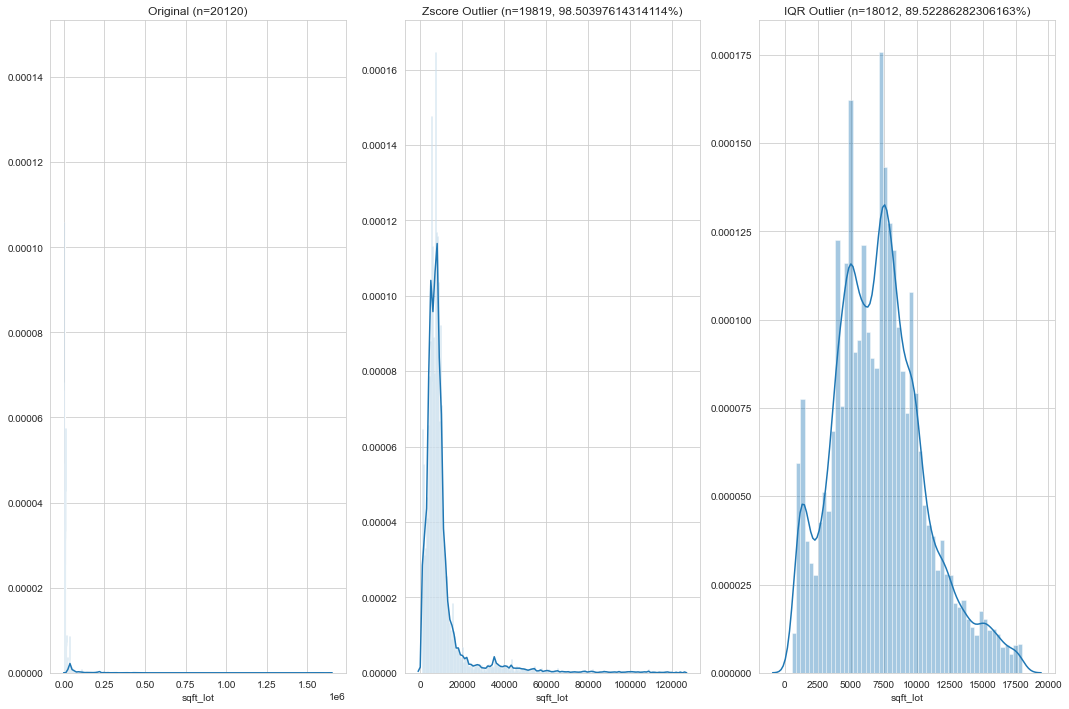

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


2108 number of data have been removed by this process.

So far we have 83.4% of original data.


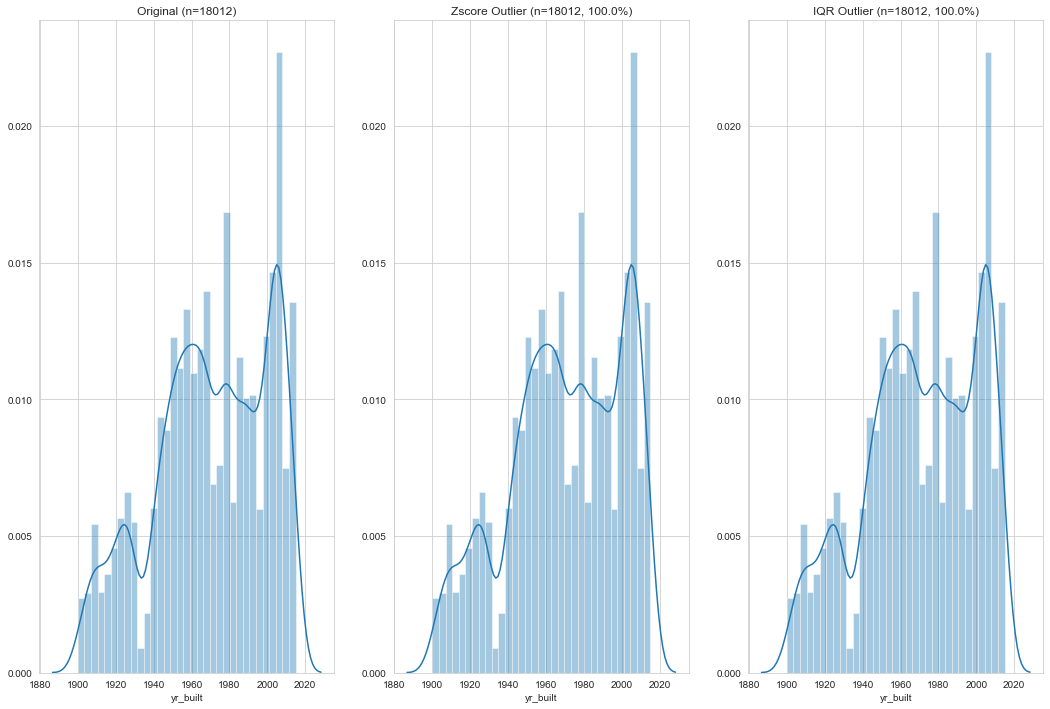

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


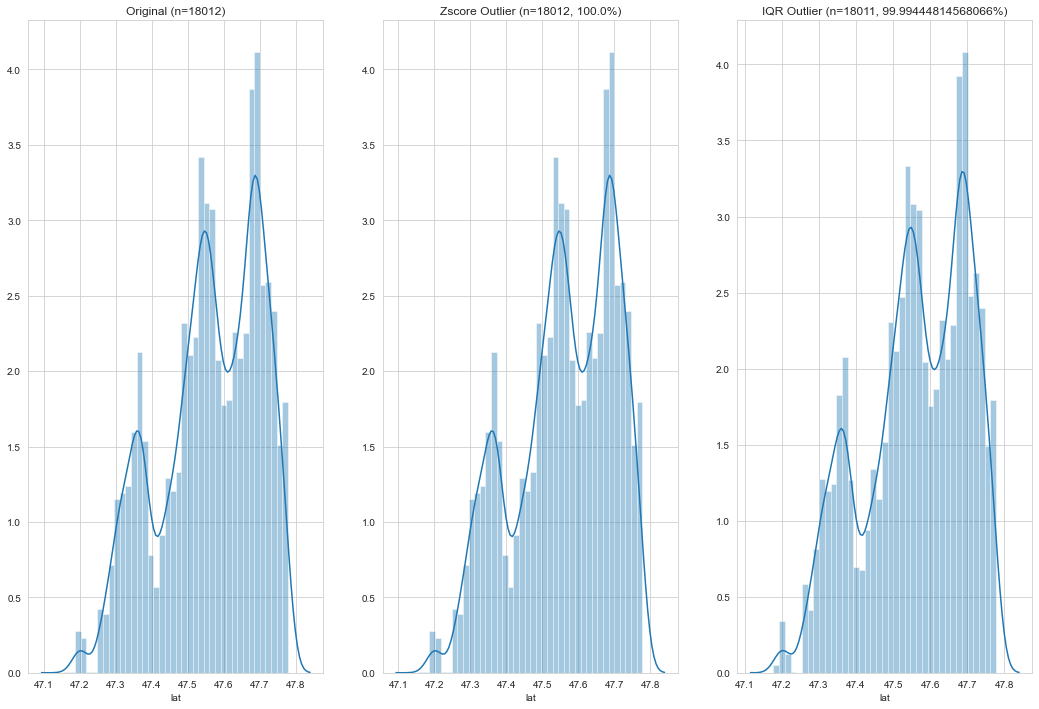

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


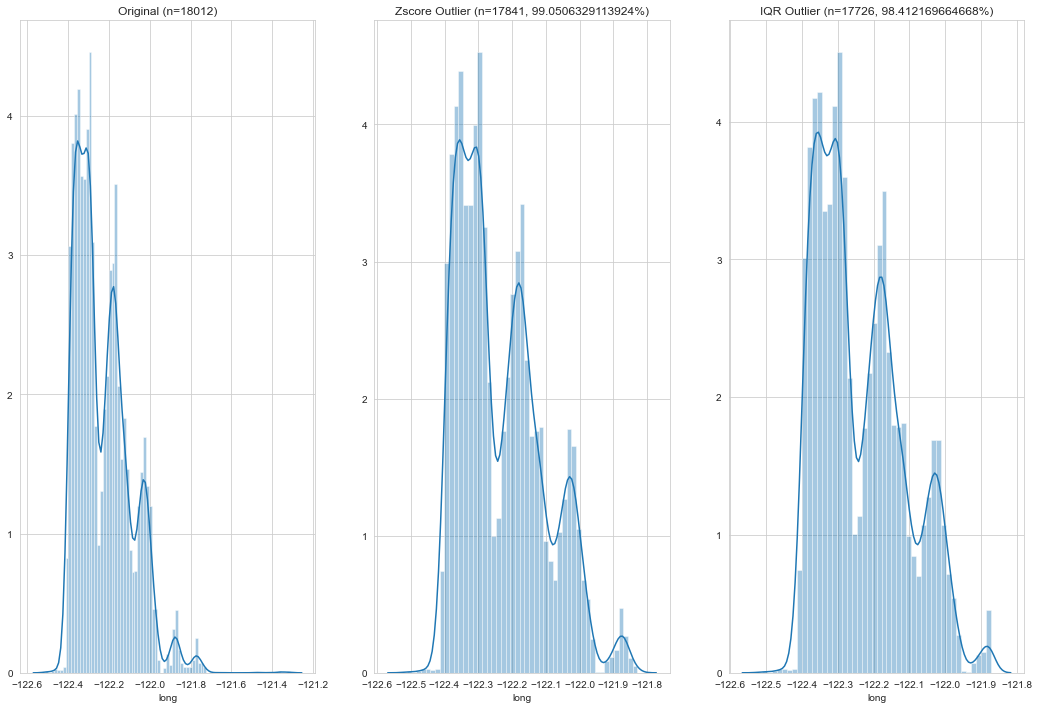

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


286 number of data have been removed by this process.

So far we have 82.076% of original data.


In [313]:
for col in cont_cols:
    model1.outlier(col)

> Based on this correlation map, we can conclude that
    - All sqft related variables are closely related.
> We will take sqft_living 

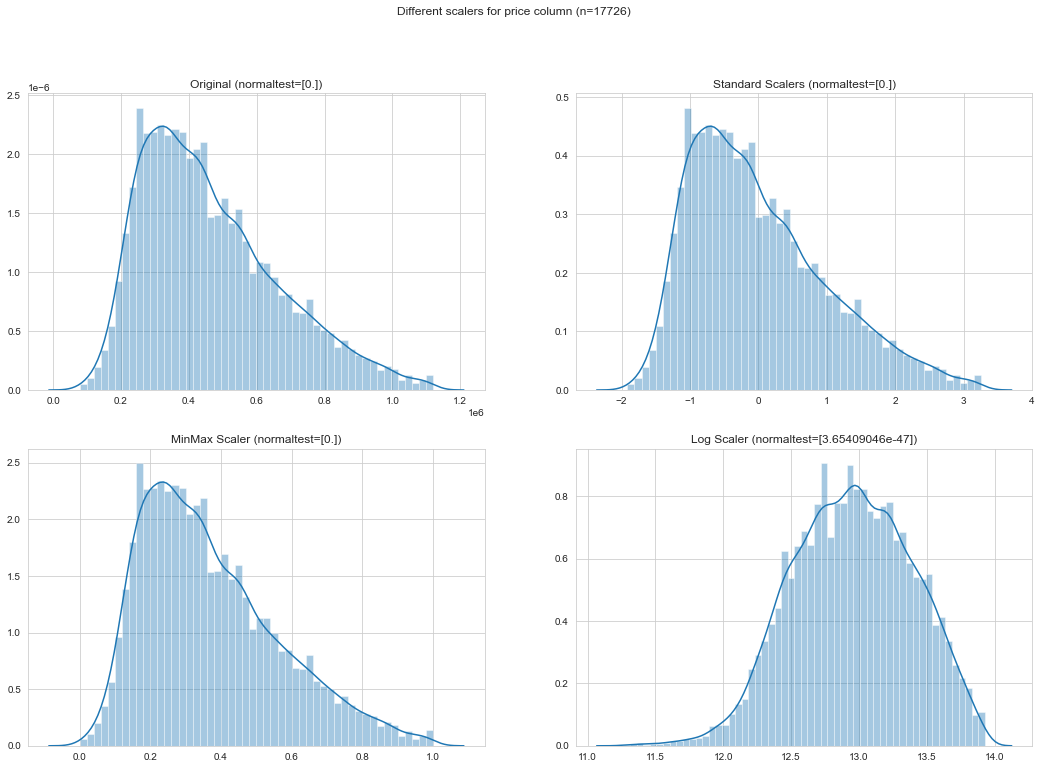

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


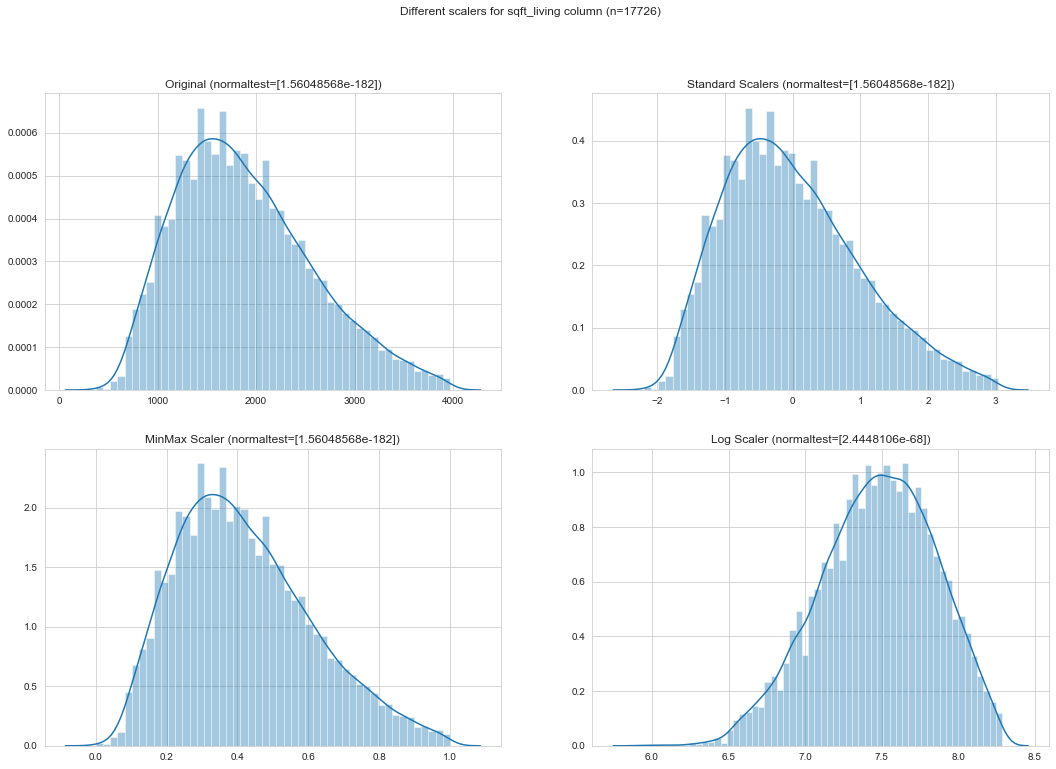

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


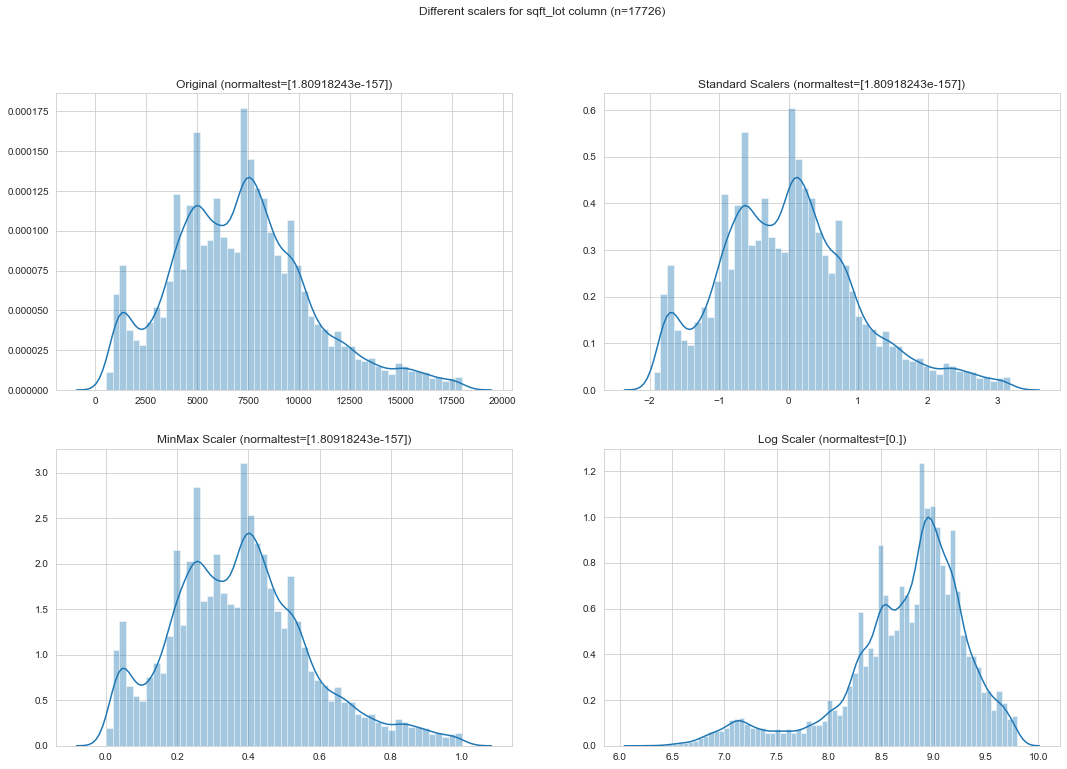

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 3


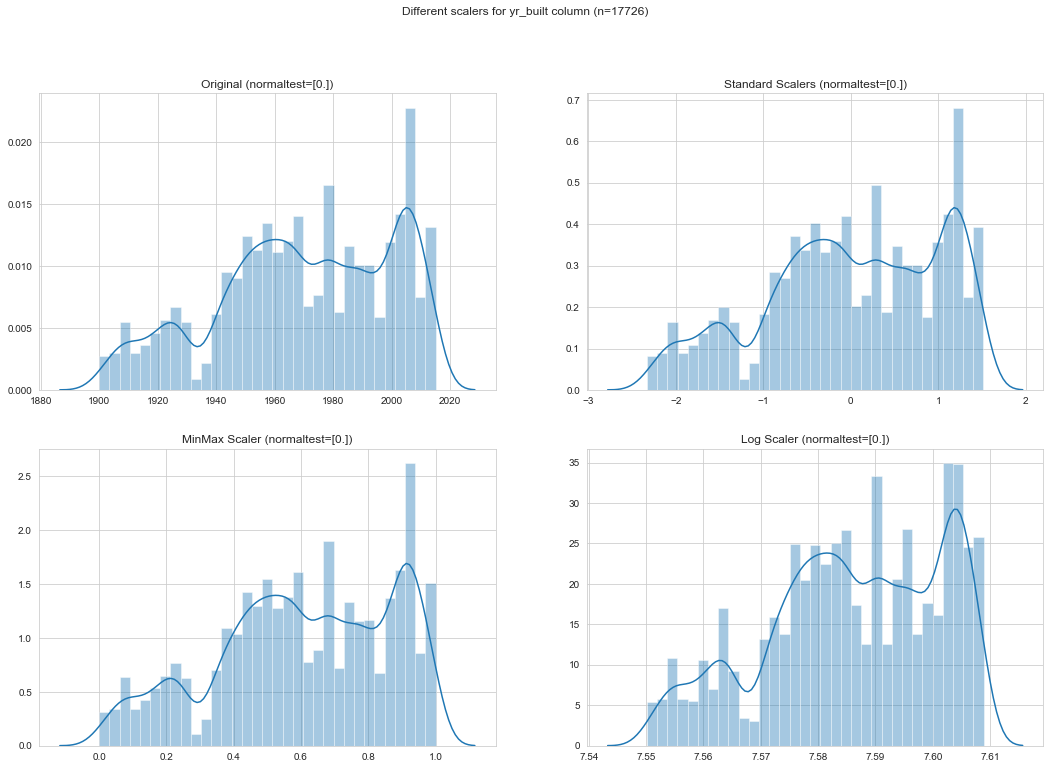

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 3


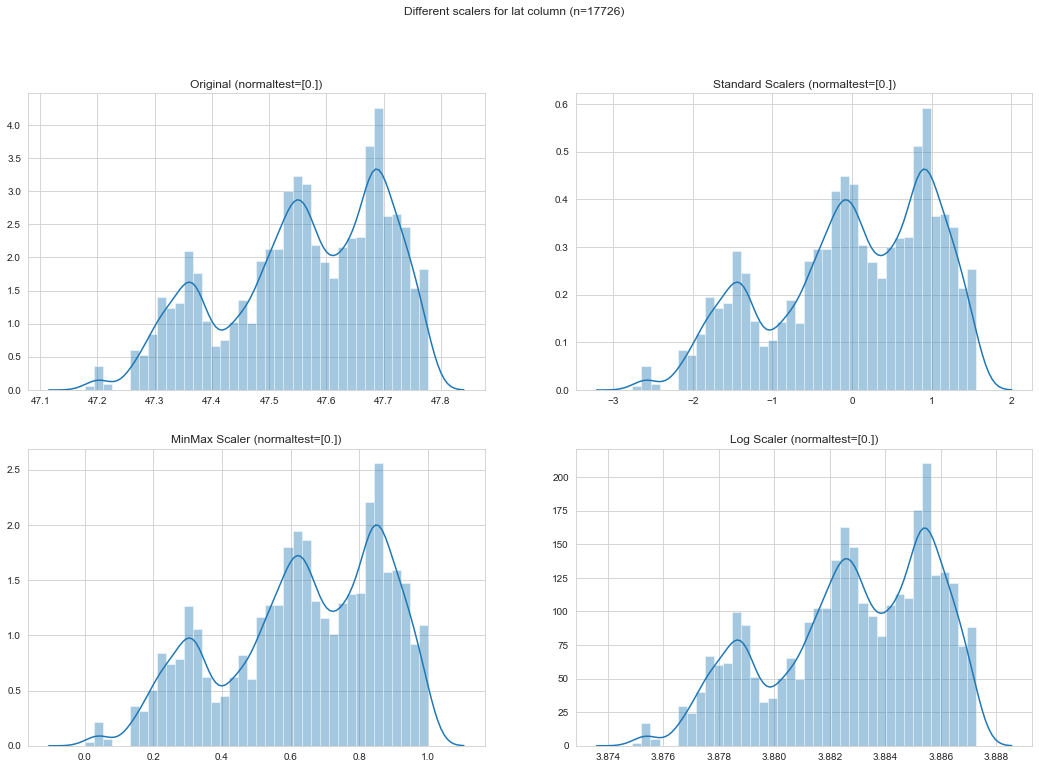

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2
Error occured


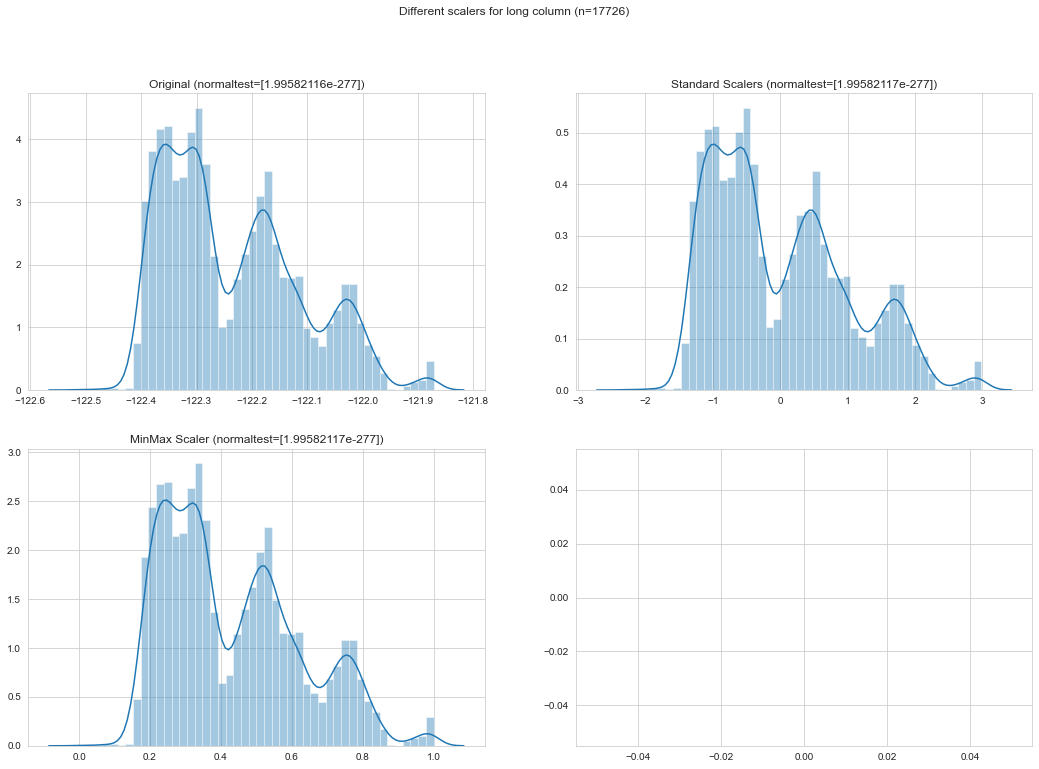

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [314]:
for col in cont_cols:
    model1.scaler(col)

,price,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,12.309987,1180,5650,1180,1955,47.5112,-122.257,1340,5650
1,13.195616,2570,7242,2170,1951,47.7210,-122.319,1690,7639
2,12.100718,770,10000,770,1933,47.7379,-122.233,2720,8062
3,13.311331,1960,5000,1050,1965,47.5208,-122.393,1360,5000
4,13.142168,1680,8080,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,12.793862,1530,1131,1530,2009,47.6993,-122.346,1530,1509
21593,12.899222,2310,5813,2310,2014,47.5107,-122.362,1830,7200
21594,12.904461,1020,1350,1020,2009,47.5944,-122.299,1020,2007
21595,12.899222,1600,2388,1600,2004,47.5345,-122.069,1410,1287


In [315]:
features = ' + '.join(model1.cont_cols)
features

'price + sqft_living + sqft_lot + yr_built + lat + long'

In [317]:
formula = 'price ~ '+features
formula

'price ~ price + sqft_living + sqft_lot + yr_built + lat + long'

In [325]:
formula = model1.get_formula(cat=False)
formula = 'price ~ sqft_living + sqft_lot + yr_built + lat + long'

In [326]:
model = smf.ols(formula, sample)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6103.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:04:51   Log-Likelihood:                -3127.2
No. Observations:               20439   AIC:                             6266.
Df Residuals:                   20433   BIC:                             6314.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -65.8233      2.062    -31.918      0.000     -69.866     -61.781
sqft_living     0.0004    2.8e-06    127.283      0.000       0.000       0.000
sqft_lot     4.885e-07   5.12e-08      9.539      0.000    3.88e-07    5.89e-07
yr_built       -0.0009   7.81e-05    -11.094      0.000      -0.001      -0.001
lat             1.4833      0.014    103.709      0.000       1.455       1.511
long           -0.0758      0.016     -4.800      0.000      -0.107      -0.045
==============================================================================
Omnibus:                      247.413   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.123
Skew:                          -0.162   Prob(JB):                     8.44e-75
Kurtosis:                       3.544   Cond. No.                     4.45e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
sample = pd.concat([model1.data[cont_cols].drop(columns=['price','sqft_living15','sqft_lot15']), model1.data['price']], axis=1)

In [217]:
sample

,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,price
0,1180,5650,1180,1955,47.5112,-122.257,12.309987
1,2570,7242,2170,1951,47.7210,-122.319,13.195616
2,770,10000,770,1933,47.7379,-122.233,12.100718
3,1960,5000,1050,1965,47.5208,-122.393,13.311331
4,1680,8080,1680,1987,47.6168,-122.045,13.142168
...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,47.6993,-122.346,12.793862
21593,2310,5813,2310,2014,47.5107,-122.362,12.899222
21594,1020,1350,1020,2009,47.5944,-122.299,12.904461
21595,1600,2388,1600,2004,47.5345,-122.069,12.899222
